<a id="title_ID"></a>
# Beginner: Search The TESS Input Catalog Centered On HD 209458.

This notebook tutorial demonstrates how to do a cone search centered on the location of a target (in this example, the star HD 209458) in the TESS Input Catalog.  We will then select a subset of the returned targets based on their Luminosity Class values.  Finally, we will identify the TIC object that is closest on the sky to HD 209458 as a means to determine the star's TIC number.  This tutorial uses Python and the astroquery module.  Information on how to install astroquery for MAST can be found on the [Astroquery site](http://astroquery.readthedocs.io/).

In [84]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import LogStretch, SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astroquery.mast import Catalogs, Observations

## Setup The Search Parameters

Let's start by defining the name of our target and our desired search radius in degrees.

In [2]:
target_name = "HD 209458"
search_radius_deg = 0.2

# Astroquery Catalog Cone Search

We will now use the Catalogs `query_object` function to do a cone search centered on HD 209458 and return the rows from the TIC catalog.  The function makes use of MAST's name resolver to convert a target name (as a string) into coordinates (Right Ascension and Declination).  Many types of ID's are possible, including any string that can be resolved by Simbad or NED, as well as any target in the Kepler Input Catalog, K2 EPIC Catalog, or the TESS Input Catalog.  The function also can accept a search radius size (specified in degrees), and it needs to know which catalog you want to query.  Catalog options are listed on [this page](https://astroquery.readthedocs.io/en/latest/mast/mast.html#catalog-queries).

In the second line,  we print out the numbers of returned rows.

In [3]:
# Query the TESS Input Catalog centered on HD 209458 with a 0.2 degree radius.
catalogTIC = Catalogs.query_object(target_name, radius=search_radius_deg, catalog="TIC")

# Print out the number of returned rows.
print("Number of TIC objects within %f deg of %s: %u" % (search_radius_deg, target_name, len(catalogTIC)))

Number of TIC objects within 0.200000 deg of HD 209458: 1344


### yyao: test query based on coordinate

In [9]:
 print(Observations.list_missions())

['BEFS', 'EUVE', 'FUSE', 'GALEX', 'HLA', 'HLSP', 'HST', 'HUT', 'IUE', 'JWST', 'K2', 'K2FFI', 'Kepler', 'KeplerFFI', 'PS1', 'SWIFT', 'TESS', 'TUES', 'WUPPE']


In [94]:
# works only for ICRS coordinates, use a bright star HD 46389, gaia Gmag = 7.4
# use panstar coordinate
ra = 98.243361400
dec = -3.820091650
c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
r = 5 * u.arcminute

In [95]:
result_table = Observations.query_region(c, radius=r)

In [155]:
result_table = result_table[result_table["obs_collection"]=="TESS"]

In [154]:
result_table

intentType,obs_collection,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,proposal_id,proposal_pi,dataproduct_type,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,distance
str7,str5,str10,str4,str4,str16,str12,str1,str31,float64,float64,str3,str14,str5,int64,float64,float64,float64,float64,float64,str14,float64,str3,int64,str113,str122,str193,str6,bool,float64,str11,str11,float64
science,TESS,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0006-1-2,98.9197573122945,-0.8793296023674011,N/A,"Ricker, George",image,3,58467.77562545,58489.54661869,1425.599651,600.0,1000.0,--,58541.83333,--,6,POLYGON 92.62619600 -6.68679900 93.05402900 5.06119000 105.18878400 4.93575100 104.80909000 -6.80766000,--,--,PUBLIC,False,--,17000210990,17002043526,0.0


In [156]:
dataProductsByObservation = Observations.get_product_list(result_table)
print (len(dataProductsByObservation))

1986


In [157]:
dataProductsByObservation[:5]

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str11,str4,str5,str34,str29,str1,str62,str7,str1,str4,str1,str4,str20,str3,str44,int64,str11
17000221062,TESS,image,tess2018349182939-s0006-1-2-0126-s,Calibrated full frame image,S,mast:TESS/product/tess2018349182939-s0006-1-2-0126-s_ffic.fits,SCIENCE,--,FFIC,--,SPOC,spoc-3.3.55-20190205,N/A,tess2018349182939-s0006-1-2-0126-s_ffic.fits,35547840,17000210990
17000221062,TESS,image,tess2018349182939-s0006-1-2-0126-s,Uncalibrated full frame image,S,mast:TESS/product/tess2018349182939-s0006-1-2-0126-s_ffir.fits,SCIENCE,--,FFIR,--,SPOC,spoc-3.3.55-20190205,N/A,tess2018349182939-s0006-1-2-0126-s_ffir.fits,17775360,17000210990
17000211890,TESS,image,tess2018349185939-s0006-1-2-0126-s,Calibrated full frame image,S,mast:TESS/product/tess2018349185939-s0006-1-2-0126-s_ffic.fits,SCIENCE,--,FFIC,--,SPOC,spoc-3.3.55-20190205,N/A,tess2018349185939-s0006-1-2-0126-s_ffic.fits,35547840,17000210990
17000211890,TESS,image,tess2018349185939-s0006-1-2-0126-s,Uncalibrated full frame image,S,mast:TESS/product/tess2018349185939-s0006-1-2-0126-s_ffir.fits,SCIENCE,--,FFIR,--,SPOC,spoc-3.3.55-20190205,N/A,tess2018349185939-s0006-1-2-0126-s_ffir.fits,17775360,17000210990
17000212811,TESS,image,tess2018349192939-s0006-1-2-0126-s,Calibrated full frame image,S,mast:TESS/product/tess2018349192939-s0006-1-2-0126-s_ffic.fits,SCIENCE,--,FFIC,--,SPOC,spoc-3.3.55-20190205,N/A,tess2018349192939-s0006-1-2-0126-s_ffic.fits,35547840,17000210990


In [33]:
obsid = result_table[0]['obsid']

In [162]:
dataProductsByID = Observations.get_product_list(obsid)
dataProductsByID = dataProductsByID[dataProductsByID["productSubGroupDescription"]=="FFIC"] # only download calibrated data
print (len(dataProductsByID))

993


In [160]:
print (len(dataProductsByID))

993


In [163]:
# Question: 27 * 2 * 24 = 1296, why only 993 images?

In [ ]:
manifest = Observations.download_products(dataProductsByID)

INFO: Found cached file ./mastDownload/TESS/tess2018349182939-s0006-1-2-0126-s/tess2018349182939-s0006-1-2-0126-s_ffic.fits with expected size 35547840. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018349185939-s0006-1-2-0126-s/tess2018349185939-s0006-1-2-0126-s_ffic.fits with expected size 35547840. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018349192939-s0006-1-2-0126-s/tess2018349192939-s0006-1-2-0126-s_ffic.fits with expected size 35547840. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018349195939-s0006-1-2-0126-s/tess2018349195939-s0006-1-2-0126-s_ffic.fits with expected size 35547840. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018349202939-s0006-1-2-0126-s/tess2018349202939-s0006-1-2-0126-s_ffic.fits with expected size 35547840. [astroquery.query]
INFO: Found cached file ./mastDownload/TESS/tess2018349205939-s0006-1-2-0126-s/tess2018349205939-s0006-1-2-0126-s_ffic.fits with expected si

In [135]:
# to many images, slow, stop after 33 images
filename = "./mastDownload/TESS/tess2018349182939-s0006-1-2-0126-s/tess2018349182939-s0006-1-2-0126-s_ffic.fits"

In [136]:
hdus = fits.open(filename)

In [138]:
fits.info(filename)

Filename: ./mastDownload/TESS/tess2018349182939-s0006-1-2-0126-s/tess2018349182939-s0006-1-2-0126-s_ffic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  CAMERA.CCD 1.2 cal    1 ImageHDU       183   (2136, 2078)   float32   
  2  CAMERA.CCD 1.2 uncert    1 ImageHDU       183   (2136, 2078)   float32   


In [144]:
w = wcs.WCS(hdus[1])
world =  np.array([[ra, dec]], np.float_)
pixcrd = w.wcs_world2pix(world, 0) # in python language
pixX = np.array([pixcrd[0, 0]])
pixY = np.array([pixcrd[0, 1]])
cal_image = hdus[1].data
mid_time = (hdus[1].header['TSTOP'] + hdus[1].header['TSTART']) / 2

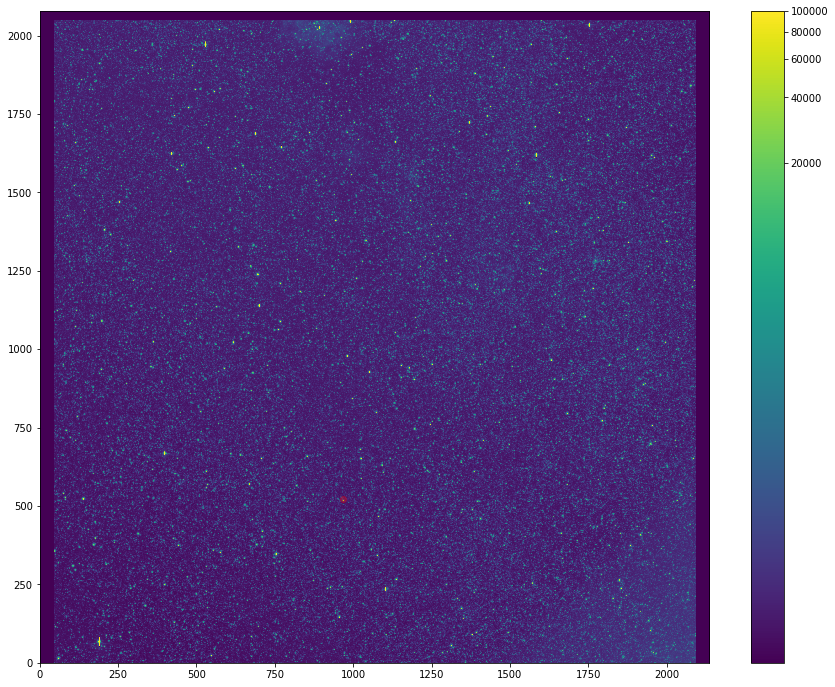

In [139]:
# display the image in pixel unit
plt.figure(figsize=(15,12))
norm = ImageNormalize(stretch=LogStretch())
plt.imshow(cal_image norm = norm, vmax = 1e+5, vmin = 100, origin = "lower left")
plt.plot(pixX, pixY, 'ro', alpha=0.3)
plt.colorbar()

(2078, 2136)

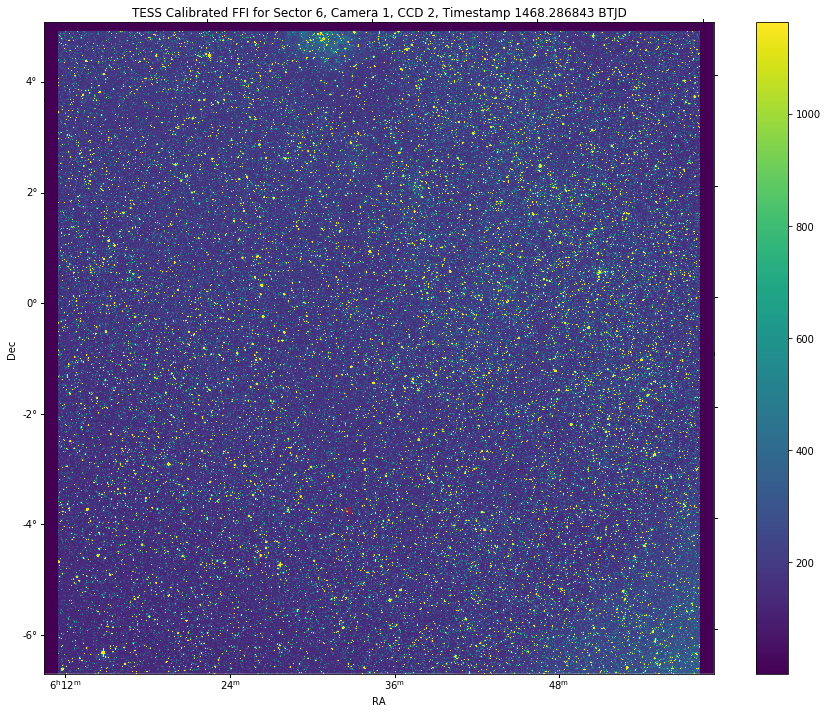

In [147]:
# display the image in wcs
plt.figure(figsize = (15,12))

plt.subplot(111, projection = w)
plt.imshow(cal_image, vmin = np.percentile(cal_image,4), vmax = np.percentile(cal_image, 98), origin = "lower")
plt.plot(pixX, pixY, 'ro', alpha=0.3)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 6, Camera 1, CCD 2, Timestamp %f BTJD" % mid_time)
plt.colorbar()
cal_image.shape

In [86]:
#norm = ImageNormalize(stretch=SqrtStretch())
#plt.imshow(hdus[2].data, norm = norm)
#plt.colorbar()

In [76]:
hdusr = fits.open("./mastDownload/TESS/tess2018349182939-s0006-1-2-0126-s/tess2018349182939-s0006-1-2-0126-s_ffir.fits")

In [78]:
hdusr[1].header["EXTNAME"]

'CAMERA.CCD 1.2 uncal'

## Examine The Returned Table

Let's take a look at the table returned from the query.  We see the returned object is an astropy Table.  We can also examine the columns available.

In [79]:
# What type of objects is the returned result?
print(type(catalogTIC))

<class 'astropy.table.table.Table'>


In [80]:
# What columns are available from the TIC?
print(catalogTIC.columns)

<TableColumns names=('ID','ra','dec','pmRA','pmDEC','Tmag','objType','typeSrc','version','HIP','TYC','UCAC','TWOMASS','SDSS','ALLWISE','GAIA','APASS','KIC','POSflag','e_pmRA','e_pmDEC','PMflag','plx','e_plx','PARflag','gallong','gallat','eclong','eclat','Bmag','e_Bmag','Vmag','e_Vmag','umag','e_umag','gmag','e_gmag','rmag','e_rmag','imag','e_imag','zmag','e_zmag','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','TWOMflag','prox','w1mag','e_w1mag','w2mag','e_w2mag','w3mag','e_w3mag','w4mag','e_w4mag','GAIAmag','e_GAIAmag','e_Tmag','TESSflag','SPFlag','Teff','e_Teff','logg','e_logg','MH','e_MH','rad','e_rad','mass','e_mass','rho','e_rho','lumclass','lum','e_lum','d','e_d','ebv','e_ebv','numcont','contratio','disposition','duplicate_id','priority','dstArcSec')>


## Select Dwarf Stars Based On Luminosity Class

Let's select a subset of the returned objects based on the "lumclass" column.  This column classifies sources in the TIC as "giant" or "dwarf".  For more information on how the columns of the TIC are populated, consult the [TESS Input Catalog paper](http://adsabs.harvard.edu/abs/2017arXiv170600495S) and the [TIC Live Release Notes](https://outerspace.stsci.edu/display/TESS/TIC+and+CTL+Data+Release+Notes+Home+Page).

In [81]:
# Identify where the luminosity class is set to "DWARF".
where_dwarfs = np.where(catalogTIC['lumclass'] == 'DWARF')[0]

# Let's also find out where the luminosity class is set to "GIANT".
where_giants = np.where(catalogTIC['lumclass'] == 'GIANT')[0]

# Let's print out the number of rows of each type within the returned objects from our search.
print("Number of objects classified as 'DWARF' within %f deg of %s: %u" %
      (search_radius_deg, target_name, len(where_dwarfs)))
print("Number of objects classified as 'GIANT' within %f deg of %s: %u" %
      (search_radius_deg, target_name, len(where_giants)))

Number of objects classified as 'DWARF' within 0.200000 deg of HD 209458: 904
Number of objects classified as 'GIANT' within 0.200000 deg of HD 209458: 28


## Find The Closest TIC ID To HD 209458

Let's now find the star in the TESS Input Catalog that is closest to our target. The table produced by the astroquery request is sorted by the column "dstArcSec" by default.  This column gives the distance in arcseconds from the requested target's position returned by the name resolver.  It should be the first row if you haven't sorted the table yet, but let's not assume that and instead find the row with the smallest "dstArcSec".

In [82]:
where_closest = np.argmin(catalogTIC['dstArcSec'])

print("Closest TIC ID to %s: TIC %s, separation of %f arcsec. and a TESS mag. of %f"%
      (target_name, catalogTIC['ID'][where_closest], catalogTIC['dstArcSec'][where_closest],
      catalogTIC['Tmag'][where_closest]))

Closest TIC ID to HD 209458: TIC 420814525, separation of 0.000012 arcsec. and a TESS mag. of 7.127400


Looks like a good match, we know that HD 209458 is a fairly bright star, and the TIC coordinate is very close to the coordinate from the name resolver.

## About this Notebook

**Author:** Scott W. Fleming, STScI Archive Scientist

**Updated On:** 2018-11-27

[Top of Page](#title_ID)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="STScI logo" width="200px"/> 